## **Libraries**

In [1]:
pip install kagglehub

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Importing** **Dataset**

In [3]:
download_path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

path = os.path.join(download_path, 'StudentPerformanceFactors.csv')

print("Path to dataset file:", path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 13.8MB/s]

Extracting files...
Path to dataset file: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9/StudentPerformanceFactors.csv


In [4]:
df = pd.read_csv(path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## **Exploratory Data Analysis**

In [5]:
df.count()

,0
Hours_Studied,6607
Attendance,6607
Parental_Involvement,6607
Access_to_Resources,6607
Extracurricular_Activities,6607
Sleep_Hours,6607
Previous_Scores,6607
Motivation_Level,6607
Internet_Access,6607
Tutoring_Sessions,6607


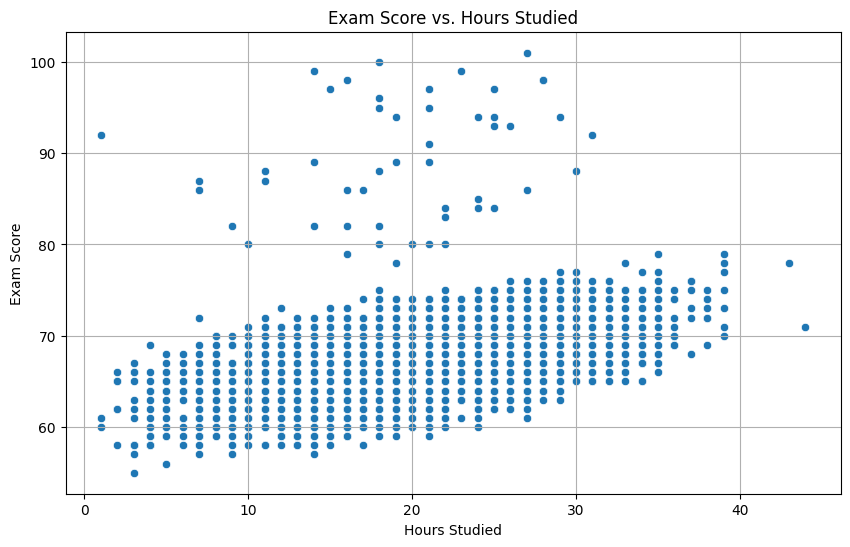

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title('Exam Score vs. Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

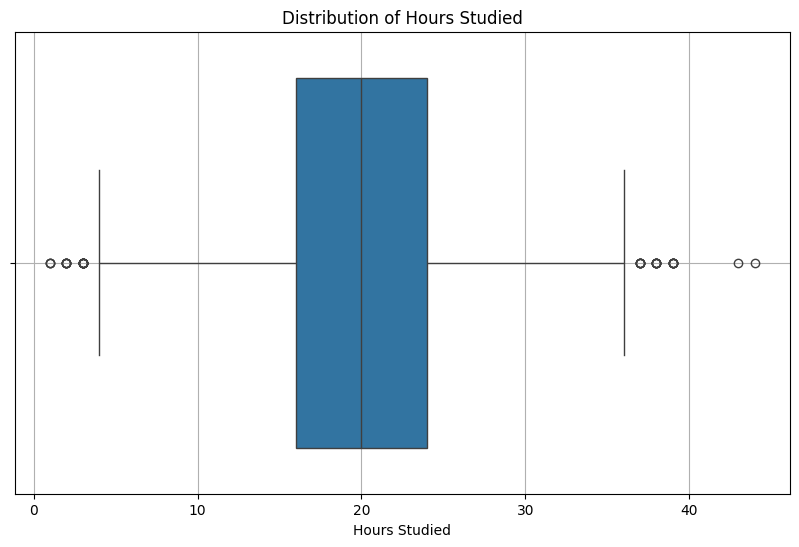

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Hours_Studied')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('')
plt.grid(True)
plt.show()

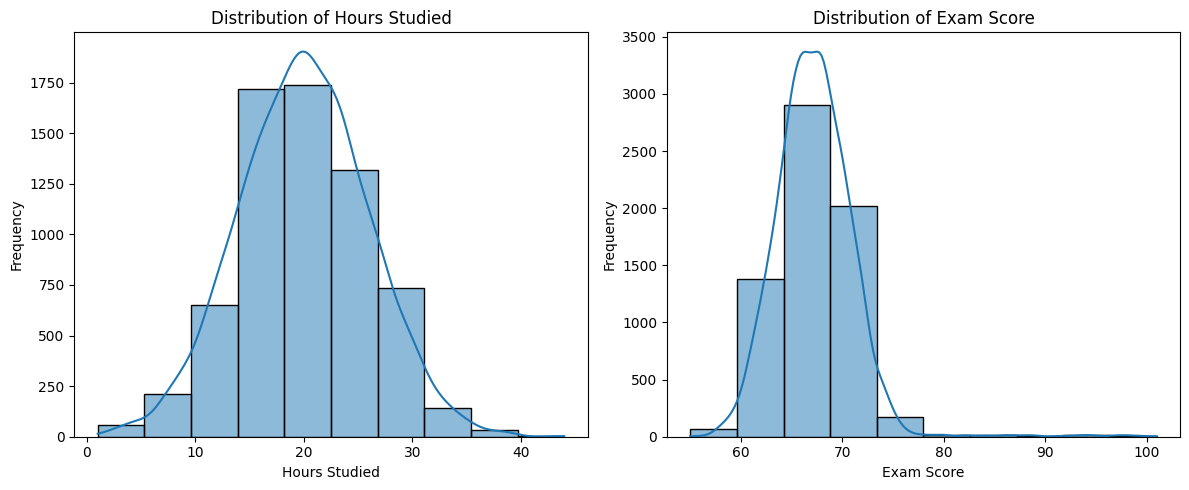

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['Hours_Studied'], kde=True, bins=10)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['Exam_Score'], kde=True, bins=10)
plt.title('Distribution of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

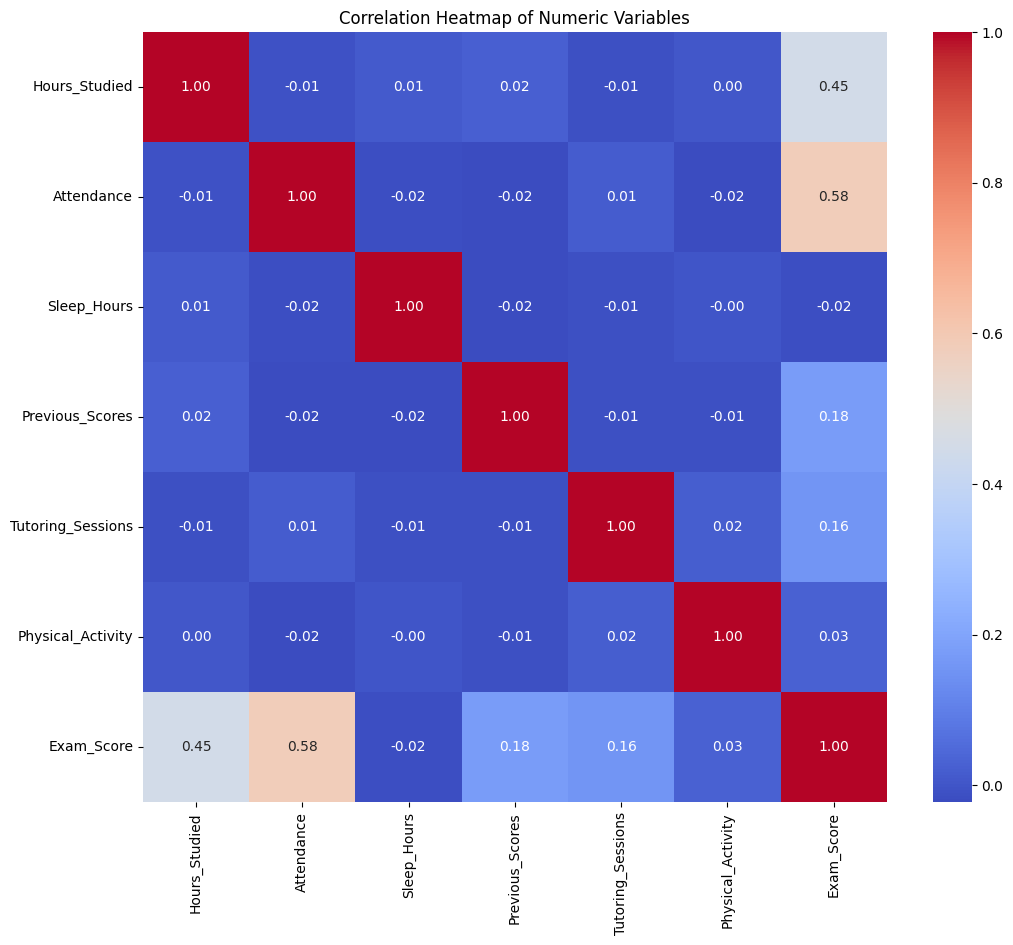

In [9]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## **Removing missing Data**

In [10]:
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data)

Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [11]:
original_rows = df.shape[0]
df.dropna(inplace=True)
print(f"Number of rows before dropping NaNs: {original_rows}")
print(f"Number of rows after dropping NaNs: {df.shape[0]}")
print(f"Number of rows dropped: {original_rows - df.shape[0]}")

missing_data_after_drop = df.isnull().sum()
print("\nMissing values per column after dropping NaNs:")
print(missing_data_after_drop)

Number of rows before dropping NaNs: 6607
Number of rows after dropping NaNs: 6378
Number of rows dropped: 229

Missing values per column after dropping NaNs:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


## **Removing Outliers**

Original number of rows: 6378
Number of rows after outlier removal: 6275
Number of outliers removed: 103


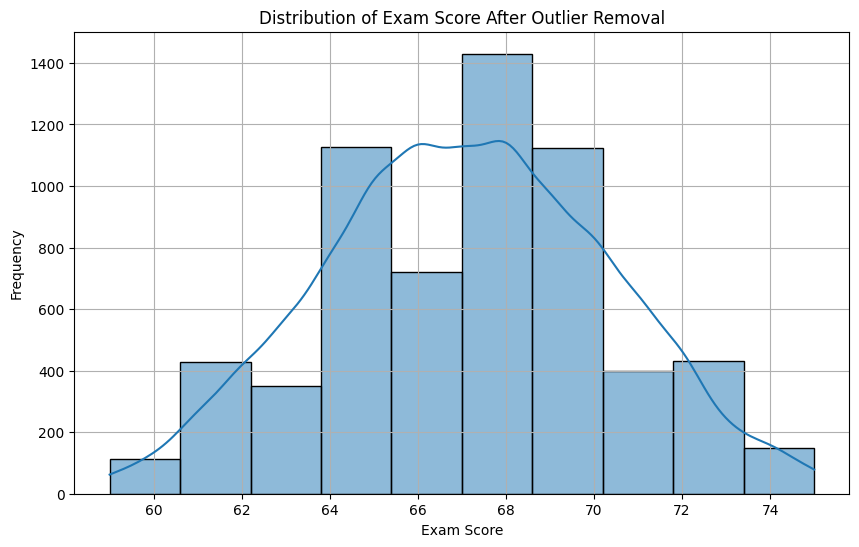

In [12]:
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Exam_Score'] >= lower_bound) & (df['Exam_Score'] <= upper_bound)]

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_no_outliers)}")
print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")

df = df_no_outliers.copy()

plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True, bins=10)
plt.title('Distribution of Exam Score After Outlier Removal')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## **Linear Regression**

### **Training on Studied Hours**

In [13]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (5020, 1)
x_test shape: (1255, 1)
y_train shape: (5020,)
y_test shape: (1255,)


In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

## **Evaluation**

In [15]:
y_train_pred = model.predict(x_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("--- Training Set Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (R2): {r2_train:.4f}")

print("\n--- Testing Set Evaluation ---")

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R-squared (R2): {r2_test:.4f}")

--- Training Set Evaluation ---
Mean Squared Error (MSE): 8.0137
Mean Absolute Error (MAE): 2.3336
R-squared (R2): 0.2376

--- Testing Set Evaluation ---
Mean Squared Error (MSE): 7.5133
Mean Absolute Error (MAE): 2.2860
R-squared (R2): 0.3082


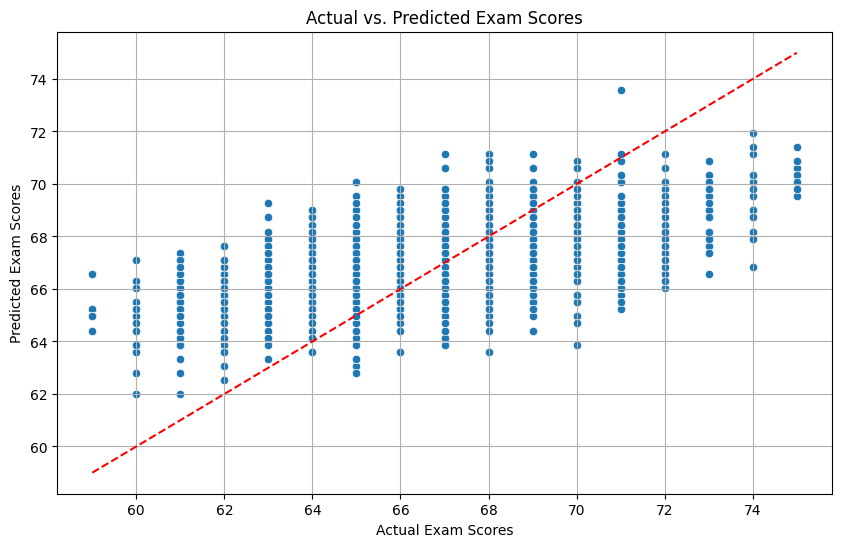

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Exam Scores')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)
plt.show()

Hours studied is not a good predictor of exam scores.

### **Retraining on all numerical variables**

In [17]:
X_multi = df.select_dtypes(include=['number']).drop('Exam_Score', axis=1)
y_multi = df['Exam_Score']

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print(f"x_train_multi shape: {x_train_multi.shape}")
print(f"x_test_multi shape: {x_test_multi.shape}")
print(f"y_train_multi shape: {y_train_multi.shape}")
print(f"y_test_multi shape: {y_test_multi.shape}")

x_train_multi shape: (5020, 6)
x_test_multi shape: (1255, 6)
y_train_multi shape: (5020,)
y_test_multi shape: (1255,)


In [18]:
model_multi = LinearRegression()
model_multi.fit(x_train_multi, y_train_multi)

y_pred_multi = model_multi.predict(x_test_multi)

In [19]:
y_train_pred_multi = model_multi.predict(x_train_multi)

mse_train_multi = mean_squared_error(y_train_multi, y_train_pred_multi)
mae_train_multi = mean_absolute_error(y_train_multi, y_train_pred_multi)
r2_train_multi = r2_score(y_train_multi, y_train_pred_multi)

print("--- Training Set Evaluation (Multi-variable) ---")
print(f"Mean Squared Error (MSE): {mse_train_multi:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_multi:.4f}")
print(f"R-squared (R2): {r2_train_multi:.4f}")

print("\n--- Testing Set Evaluation (Multi-variable) ---")

mse_test_multi = mean_squared_error(y_test_multi, y_pred_multi)
mae_test_multi = mean_absolute_error(y_test_multi, y_pred_multi)
r2_test_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Squared Error (MSE): {mse_test_multi:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_multi:.4f}")
print(f"R-squared (R2): {r2_test_multi:.4f}")

--- Training Set Evaluation (Multi-variable) ---
Mean Squared Error (MSE): 2.0391
Mean Absolute Error (MAE): 1.1462
R-squared (R2): 0.8060

--- Testing Set Evaluation (Multi-variable) ---
Mean Squared Error (MSE): 1.8306
Mean Absolute Error (MAE): 1.0895
R-squared (R2): 0.8314


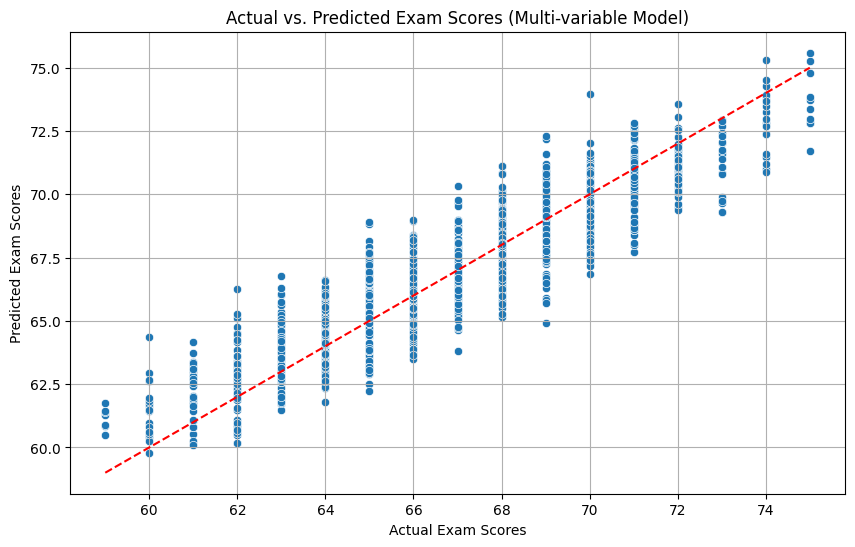

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_multi, y=y_pred_multi)
plt.plot([min(y_test_multi), max(y_test_multi)], [min(y_test_multi), max(y_test_multi)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Exam Scores (Multi-variable Model)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)
plt.show()

### **Retraining model on all variables**

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6275 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6275 non-null   int64 
 1   Attendance                  6275 non-null   int64 
 2   Parental_Involvement        6275 non-null   object
 3   Access_to_Resources         6275 non-null   object
 4   Extracurricular_Activities  6275 non-null   object
 5   Sleep_Hours                 6275 non-null   int64 
 6   Previous_Scores             6275 non-null   int64 
 7   Motivation_Level            6275 non-null   object
 8   Internet_Access             6275 non-null   object
 9   Tutoring_Sessions           6275 non-null   int64 
 10  Family_Income               6275 non-null   object
 11  Teacher_Quality             6275 non-null   object
 12  School_Type                 6275 non-null   object
 13  Peer_Influence              6275 non-null   object
 1

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### **Encoding categorical variables**

In [30]:
label_cat = df[['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality']].copy()
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
for col in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']:
    df[col] = df[col].replace(mapping)

df['Extracurricular_Activities'] = df['Extracurricular_Activities'].replace({'Yes': 1, 'No': 0})
df['Internet_Access'] = df['Internet_Access'].replace({'Yes': 1, 'No': 0})
df['Learning_Disabilities'] = df['Learning_Disabilities'].replace({'Yes': 1, 'No': 0})
df['School_Type'] = df['School_Type'].replace({'Private': 1, 'Public': 0})
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

mapping_peer_influence = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Peer_Influence'] = df['Peer_Influence'].replace(mapping_peer_influence)

mapping_parental_education = {'High School': 0, 'College': 1, 'Postgraduate': 2}
df['Parental_Education_Level'] = df['Parental_Education_Level'].replace(mapping_parental_education)

mapping_distance_from_home = {'Near': 0, 'Moderate': 1, 'Far': 2}
df['Distance_from_Home'] = df['Distance_from_Home'].replace(mapping_distance_from_home)


In [25]:
print("DataFrame Info:")
df.info()
print("\nDataFrame Head:")
df.head()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6275 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6275 non-null   int64
 1   Attendance                  6275 non-null   int64
 2   Parental_Involvement        6275 non-null   int64
 3   Access_to_Resources         6275 non-null   int64
 4   Extracurricular_Activities  6275 non-null   int64
 5   Sleep_Hours                 6275 non-null   int64
 6   Previous_Scores             6275 non-null   int64
 7   Motivation_Level            6275 non-null   int64
 8   Internet_Access             6275 non-null   int64
 9   Tutoring_Sessions           6275 non-null   int64
 10  Family_Income               6275 non-null   int64
 11  Teacher_Quality             6275 non-null   int64
 12  School_Type                 6275 non-null   int64
 13  Peer_Influence              6275 non-null   int64
 1

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,1,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,-1,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,0,4,0,2,0,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,-1,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,0,4,0,1,0,0,70


x_train_all shape: (5020, 19)
x_test_all shape: (1255, 19)
y_train_all shape: (5020,)
y_test_all shape: (1255,)

--- Training Set Evaluation (All variables) ---
Mean Squared Error (MSE): 0.0987
Mean Absolute Error (MAE): 0.2657
R-squared (R2): 0.9906

--- Testing Set Evaluation (All variables) ---
Mean Squared Error (MSE): 0.1024
Mean Absolute Error (MAE): 0.2710
R-squared (R2): 0.9906


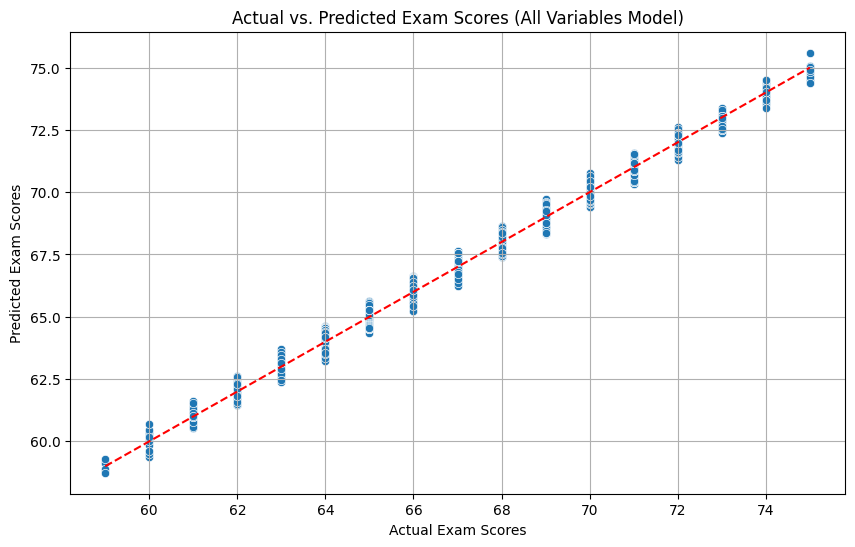

In [26]:
X_all = df.drop(['Exam_Score'], axis=1)
y_all = df['Exam_Score']

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"x_train_all shape: {x_train_all.shape}")
print(f"x_test_all shape: {x_test_all.shape}")
print(f"y_train_all shape: {y_train_all.shape}")
print(f"y_test_all shape: {y_test_all.shape}")

model_all = LinearRegression()
model_all.fit(x_train_all, y_train_all)

y_pred_all = model_all.predict(x_test_all)

y_train_pred_all = model_all.predict(x_train_all)
mse_train_all = mean_squared_error(y_train_all, y_train_pred_all)
mae_train_all = mean_absolute_error(y_train_all, y_train_pred_all)
r2_train_all = r2_score(y_train_all, y_train_pred_all)

print("\n--- Training Set Evaluation (All variables) ---")
print(f"Mean Squared Error (MSE): {mse_train_all:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_all:.4f}")
print(f"R-squared (R2): {r2_train_all:.4f}")

mse_test_all = mean_squared_error(y_test_all, y_pred_all)
mae_test_all = mean_absolute_error(y_test_all, y_pred_all)
r2_test_all = r2_score(y_test_all, y_pred_all)

print("\n--- Testing Set Evaluation (All variables) ---")
print(f"Mean Squared Error (MSE): {mse_test_all:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_all:.4f}")
print(f"R-squared (R2): {r2_test_all:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_all, y=y_pred_all)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Exam Scores (All Variables Model)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)
plt.show()

the model reports a R² of 0.9906 which indicates that the independant varibales explain 99% of the dependat variable (exam scores)

Since the training and testing MSE values are very close (0.1024 vs. 0.0987), the model demonstrates stable performance across seen and unseen data. This small difference suggests good generalization and provides no evidence of overfitting.

## **Polynomial Regression**

### **Second Degree**

--- Training Set Evaluation (Polynomial Regression, Degree 2) ---
Mean Squared Error (MSE): 0.0952
Mean Absolute Error (MAE): 0.2600
R-squared (R2): 0.9909

--- Testing Set Evaluation (Polynomial Regression, Degree 2) ---
Mean Squared Error (MSE): 0.1042
Mean Absolute Error (MAE): 0.2725
R-squared (R2): 0.9904


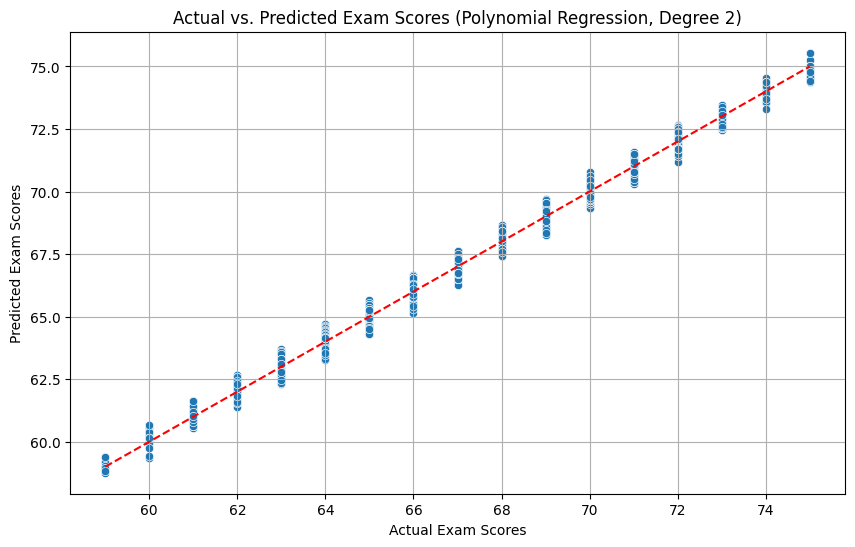

In [27]:
degree = 2
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train_all)
x_test_poly = poly.transform(x_test_all)

model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train_all)

y_pred_poly = model_poly.predict(x_test_poly)

y_train_pred_poly = model_poly.predict(x_train_poly)
mse_train_poly = mean_squared_error(y_train_all, y_train_pred_poly)
mae_train_poly = mean_absolute_error(y_train_all, y_train_pred_poly)
r2_train_poly = r2_score(y_train_all, y_train_pred_poly)

print(f"--- Training Set Evaluation (Polynomial Regression, Degree {degree}) ---")
print(f"Mean Squared Error (MSE): {mse_train_poly:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_poly:.4f}")
print(f"R-squared (R2): {r2_train_poly:.4f}")

mse_test_poly = mean_squared_error(y_test_all, y_pred_poly)
mae_test_poly = mean_absolute_error(y_test_all, y_pred_poly)
r2_test_poly = r2_score(y_test_all, y_pred_poly)

print(f"\n--- Testing Set Evaluation (Polynomial Regression, Degree {degree}) ---")
print(f"Mean Squared Error (MSE): {mse_test_poly:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_poly:.4f}")
print(f"R-squared (R2): {r2_test_poly:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_all, y=y_pred_poly)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title(f'Actual vs. Predicted Exam Scores (Polynomial Regression, Degree {degree})')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)
plt.show()

## **Polynomial Regression on High degree (5)**

--- Training Set Evaluation (Polynomial Regression, Degree 5) ---
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R2): 1.0000

--- Testing Set Evaluation (Polynomial Regression, Degree 5) ---
Mean Squared Error (MSE): 4.0850
Mean Absolute Error (MAE): 1.2764
R-squared (R2): 0.6239


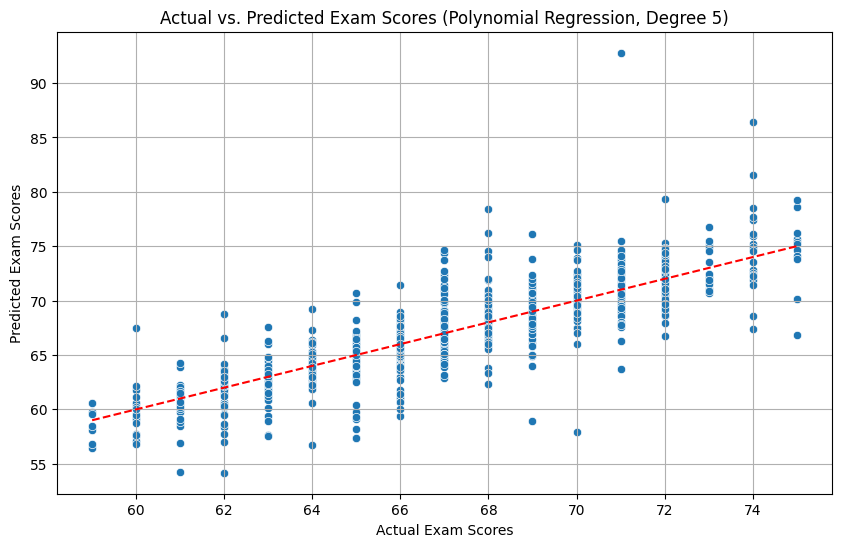

In [28]:
degree = 5
poly_degree5 = PolynomialFeatures(degree=degree)
x_train_poly_degree5 = poly_degree5.fit_transform(x_train_all)
x_test_poly_degree5 = poly_degree5.transform(x_test_all)

model_poly_degree5 = LinearRegression()
model_poly_degree5.fit(x_train_poly_degree5, y_train_all)

y_pred_poly_degree5 = model_poly_degree5.predict(x_test_poly_degree5)

y_train_pred_poly_degree5 = model_poly_degree5.predict(x_train_poly_degree5)
mse_train_poly_degree5 = mean_squared_error(y_train_all, y_train_pred_poly_degree5)
mae_train_poly_degree5 = mean_absolute_error(y_train_all, y_train_pred_poly_degree5)
r2_train_poly_degree5 = r2_score(y_train_all, y_train_pred_poly_degree5)

print(f"--- Training Set Evaluation (Polynomial Regression, Degree {degree}) ---")
print(f"Mean Squared Error (MSE): {mse_train_poly_degree5:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_poly_degree5:.4f}")
print(f"R-squared (R2): {r2_train_poly_degree5:.4f}")

mse_test_poly_degree5 = mean_squared_error(y_test_all, y_pred_poly_degree5)
mae_test_poly_degree5 = mean_absolute_error(y_test_all, y_pred_poly_degree5)
r2_test_poly_degree5 = r2_score(y_test_all, y_pred_poly_degree5)

print(f"\n--- Testing Set Evaluation (Polynomial Regression, Degree {degree}) ---")
print(f"Mean Squared Error (MSE): {mse_test_poly_degree5:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_poly_degree5:.4f}")
print(f"R-squared (R2): {r2_test_poly_degree5:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_all, y=y_pred_poly_degree5)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title(f'Actual vs. Predicted Exam Scores (Polynomial Regression, Degree {degree})')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)
plt.show()

Polynomial regression with degree = 5 results in zero training error and an R² of 1.0, indicating a perfect fit to the training data. However, this performance does not extend to the testing set, where the MSE increases dramatically to 4.0850 and the R² drops to 0.6239. This large discrepancy between training and testing performance demonstrates severe overfitting, as the model captures noise and idiosyncrasies of the training data rather than the underlying relationship. The results highlight the bias–variance tradeoff, where excessive model complexity leads to poor generalization.

## **Comparison Between Models**


--- Model Comparison Table ---
                           Model  Train MSE  Test MSE  Train MAE  Test MAE  Train R2  Test R2
               Linear Regression   0.098696  0.102437   0.265721  0.270955  0.990610 0.990568
Polynomial Regression (Degree 2)   0.095179  0.104226   0.259962  0.272511  0.990945 0.990403


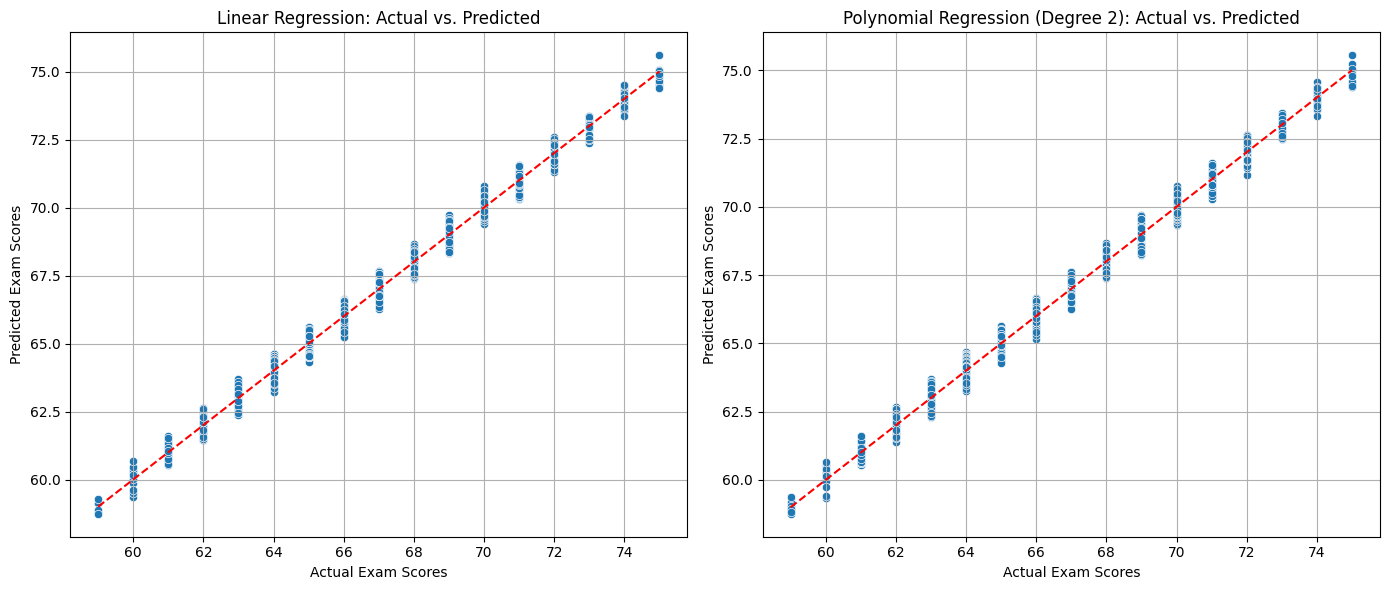

In [29]:
comparison_data = {
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)'],
    'Train MSE': [mse_train_all, mse_train_poly],
    'Test MSE': [mse_test_all, mse_test_poly],
    'Train MAE': [mae_train_all, mae_train_poly],
    'Test MAE': [mae_test_all, mae_test_poly],
    'Train R2': [r2_train_all, r2_train_poly],
    'Test R2': [r2_test_all, r2_test_poly]
}
comparison_df = pd.DataFrame(comparison_data)

print("\n--- Model Comparison Table ---")
print(comparison_df.to_string(index=False))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_all, y=y_pred_all)
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_all, y=model_poly.predict(poly.fit_transform(x_test_all)))
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.title('Polynomial Regression (Degree 2): Actual vs. Predicted')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.grid(True)

plt.tight_layout()
plt.show()

A comparison between linear regression and polynomial regression (degree = 2) was conducted to evaluate the impact of model complexity. While the polynomial model achieved slightly lower training errors, it did not improve testing performance. In fact, linear regression produced lower test MSE (0.1024 vs. 0.1042) and MAE (0.2710 vs. 0.2725), with nearly identical R² values for both models. Additionally, the polynomial model exhibited a larger training–testing error gap. These results indicate that the linear regression model generalizes better to unseen data and is therefore preferred due to its simplicity and comparable predictive performance.